# Student Performance
#### This data set consists of the marks secured by the students in various subjects. Let's dig deep into this data and see what kind of features we have at hand and if we can make some sense out of it.
##### 1. Importing Packages and Setup

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

#### 2. Reading the data and initial impressions of the data

In [6]:
data = pd.read_csv('Data/StudentsPerformance.csv')
print(f'Shape of the data : {data.shape}')
print(f'Number of features : {data.shape[1]}')

Shape of the data : (1000, 8)
Number of features : 8


In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
categorical_variables = list(data.select_dtypes(include = 'object').columns)
numerical_variables = list(data.select_dtypes(include = ['int','float']).columns)
print(f'Categorical Variables : {categorical_variables}')
print(f'Numerical Variables : {numerical_variables}')

Categorical Variables : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Variables : ['math score', 'reading score', 'writing score']


In [9]:
data.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

#### The initial impressions of the data tell us the dimensions of the data and the types of features we have at hand. This helps us further devide our analysis into two parts because of the types of data. Since the data does not have any null values this solves us the trouble of imputing.deleting the null values in both categorical and numerical features in the data.

#### We can start with out analysis of the data step by step and since we have 2 types of data it's best to analyze them separately and then together.

### 3. Univariate Analysis
#### i. Cotinuous Features
##### Distribution plots of the numerical features show us the spread of the numbers over all samples. A kernel density estimate (KDE) is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

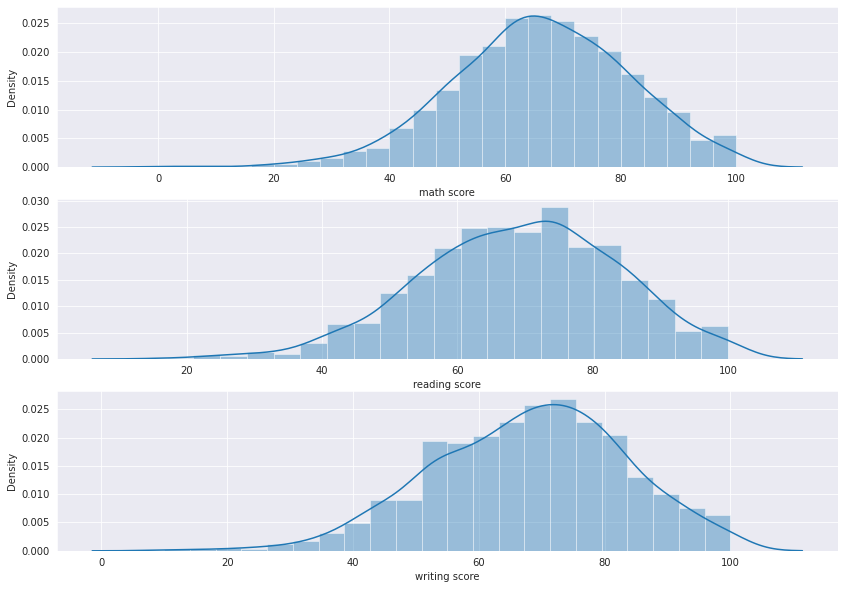

In [10]:
fig=plt.figure(figsize=(14, 10)) 
columns = 1 
rows = 3
num_col = 0
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i) 
    sns.distplot(data[numerical_variables[num_col]],kde = True)
    num_col+=1
plt.show()

##### We saw the distribution of the numerical features over all samples individually. Let's plot the KDE plots of all of these on the same graph to see how does their distribution differ.

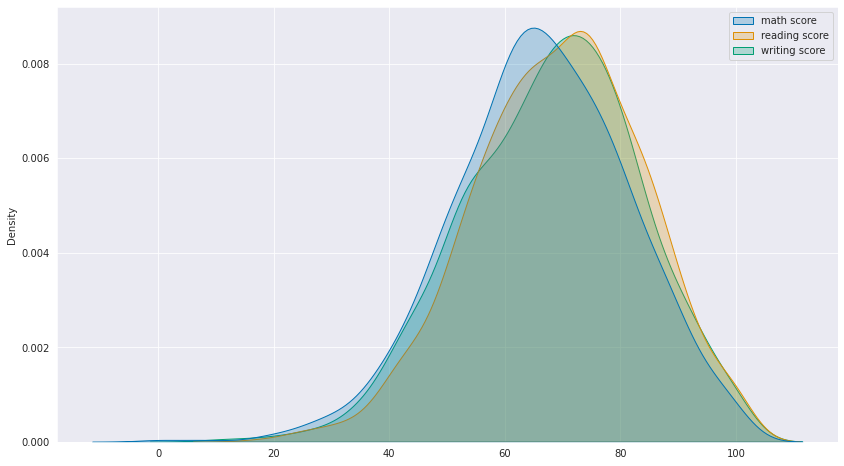

In [12]:
plt.figure(figsize = (14,8))
sns.kdeplot(data=data[numerical_variables],shade=True,palette='colorblind')
plt.show()

#### This shows us how similar the distribution of all the scores is. We have total 3 scores, we can create a final score as the average of all these scores to get a new feature which is the aggregation of these 3 features.

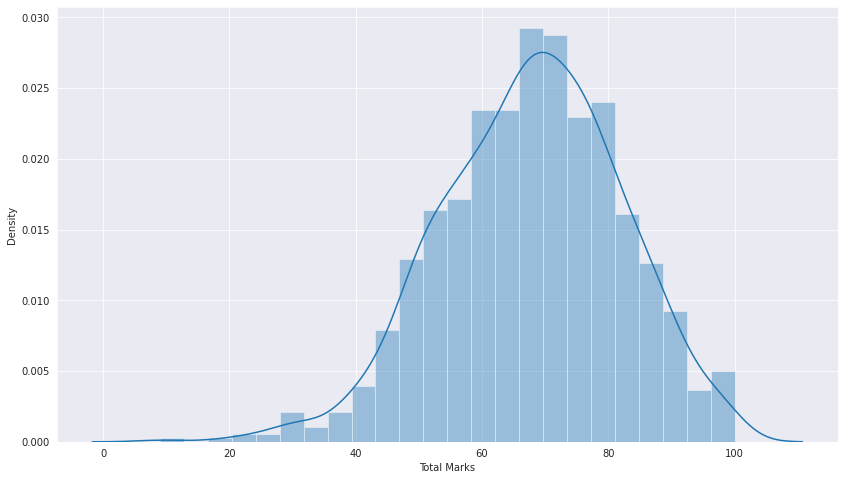

In [16]:
data['Total Marks'] = (data['math score'] + data['reading score'] + data['writing score'])/3
fig=plt.figure(figsize=(14,8))
sns.distplot(data['Total Marks'],kde = True)
plt.show()

#### ii. Cateorical Features
##### The best way to show the distribution of of categorical features is to plot the counts of unique values in each feature

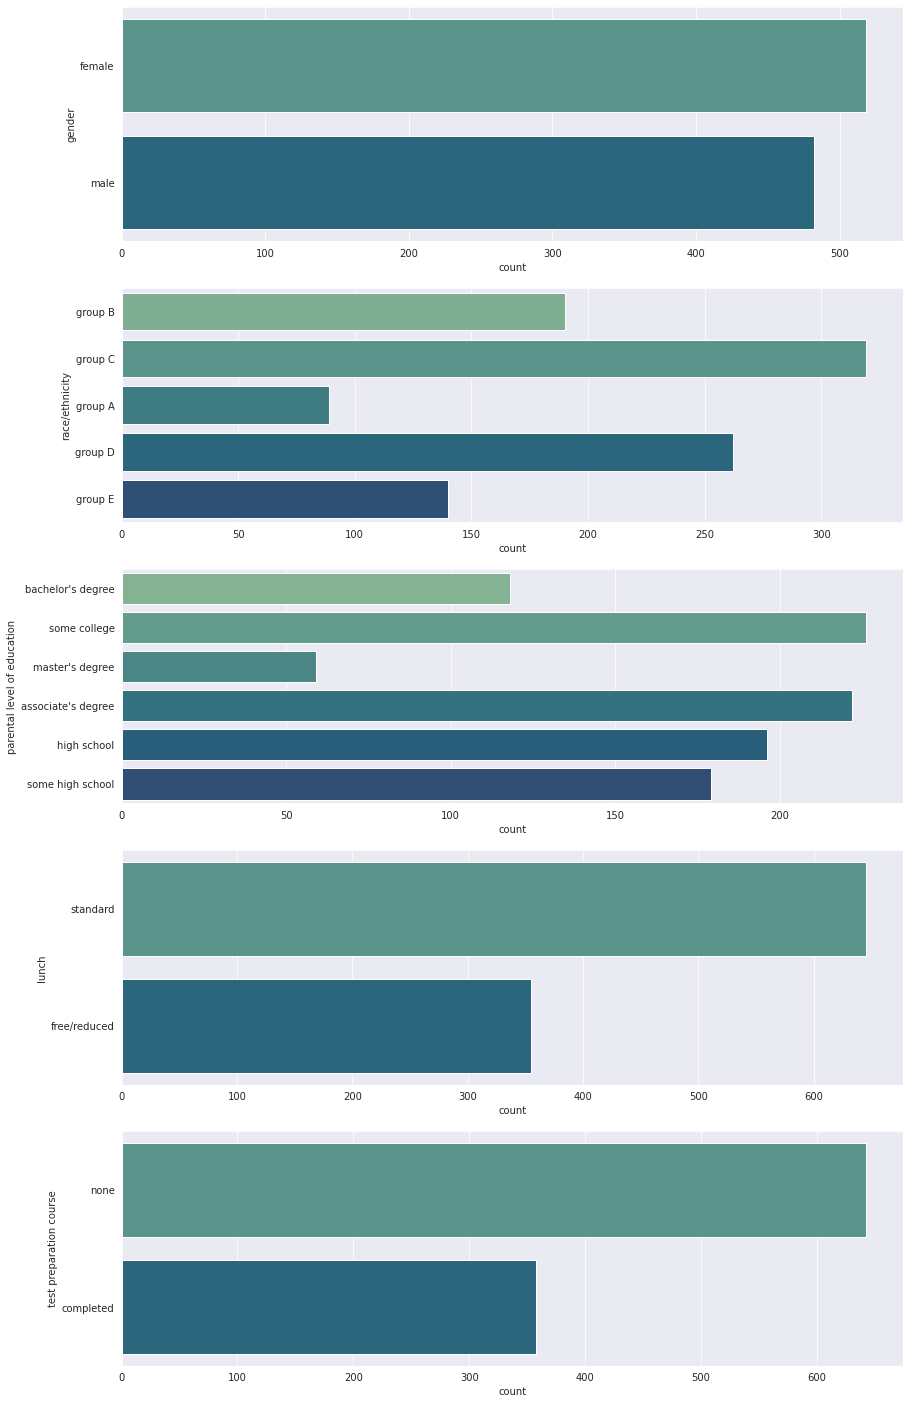

In [20]:
fig=plt.figure(figsize=(14, 25)) 
columns = 1 
rows = 5
num_col = 0
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i) 
    sns.countplot(y = categorical_variables[num_col],data = data,palette = 'crest')
    num_col+=1
plt.show() 

#### These plots give us a lot of information which might be of use to us in the future.<br>1. There are more females than males<br>2. There are more people of group c race/ethnicity than any other.<br>3. The most frequent parental level of education is some college or associate's degree.<br>4. Most Students have selected standard lunch over free/reduced lunch<br>5. The difference between students who have completed test preparation course and the ones who haven't is almost double with the ones who haven't completed in majority.

### 4. Bivariate Analysis

#### Plotting scatter plots of all numerical feautures against each other helps us visualize the patterns between features

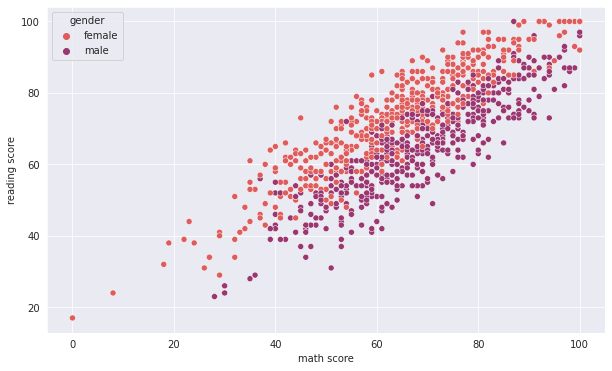

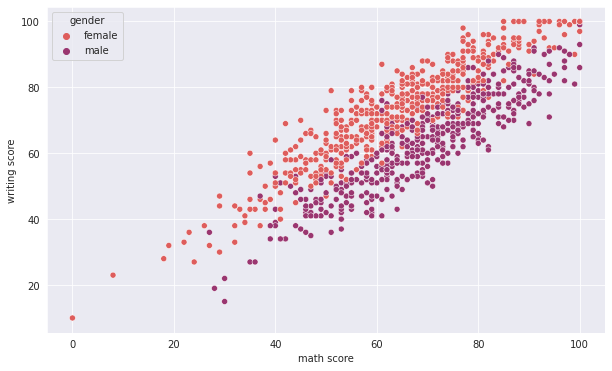

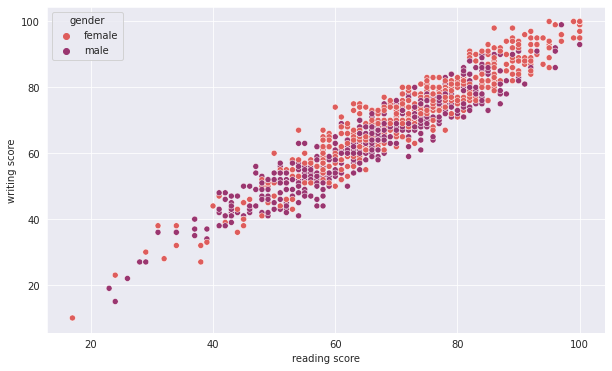

In [21]:
for i in range(len(numerical_variables)-1):
    for j in range(i+1,len(numerical_variables)):
        plt.figure(figsize = (10,6))
        sns.scatterplot(numerical_variables[i],numerical_variables[j],data = data,hue = 'gender',palette = 'flare')
        plt.show()

##### As we can see the pattern is fairly simple. All features seems to be positively correlated with each other. We can also use heatmap to see the correlation.

<AxesSubplot:>

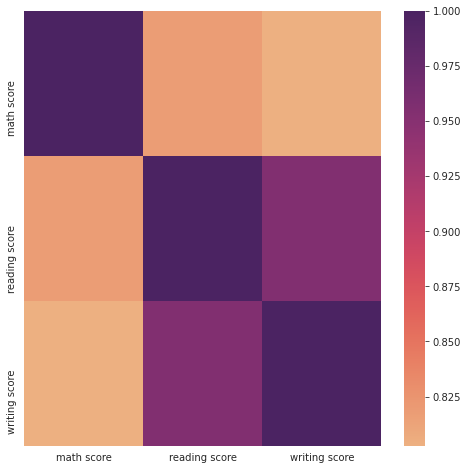

In [22]:
plt.figure(figsize = (8,8))
sns.heatmap(data[numerical_variables].corr(),cmap = 'flare')

##### Our score starts at 0.825, this shows us the high correlation coeffiencts of features

##### Analyzing cateorical and numerical features in bar plots might give us some interesting patterns

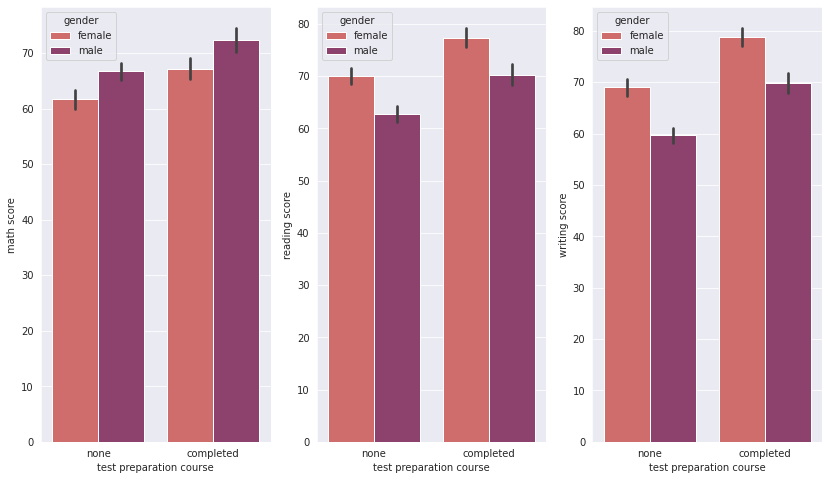

In [23]:
fig=plt.figure(figsize=(14,8)) 
columns = 3 
rows = 1
num_col = 0
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i) 
    sns.barplot(x = 'test preparation course',y = numerical_variables[num_col],hue = 'gender',data = data,palette = 'flare')
    num_col+=1
plt.show() 

#### The above plots shows us that the scores of both the genders (male and female) increase when their test prepation course is completed. So If we had to predict the final score of a student then the "test preparation course" feature is an important one

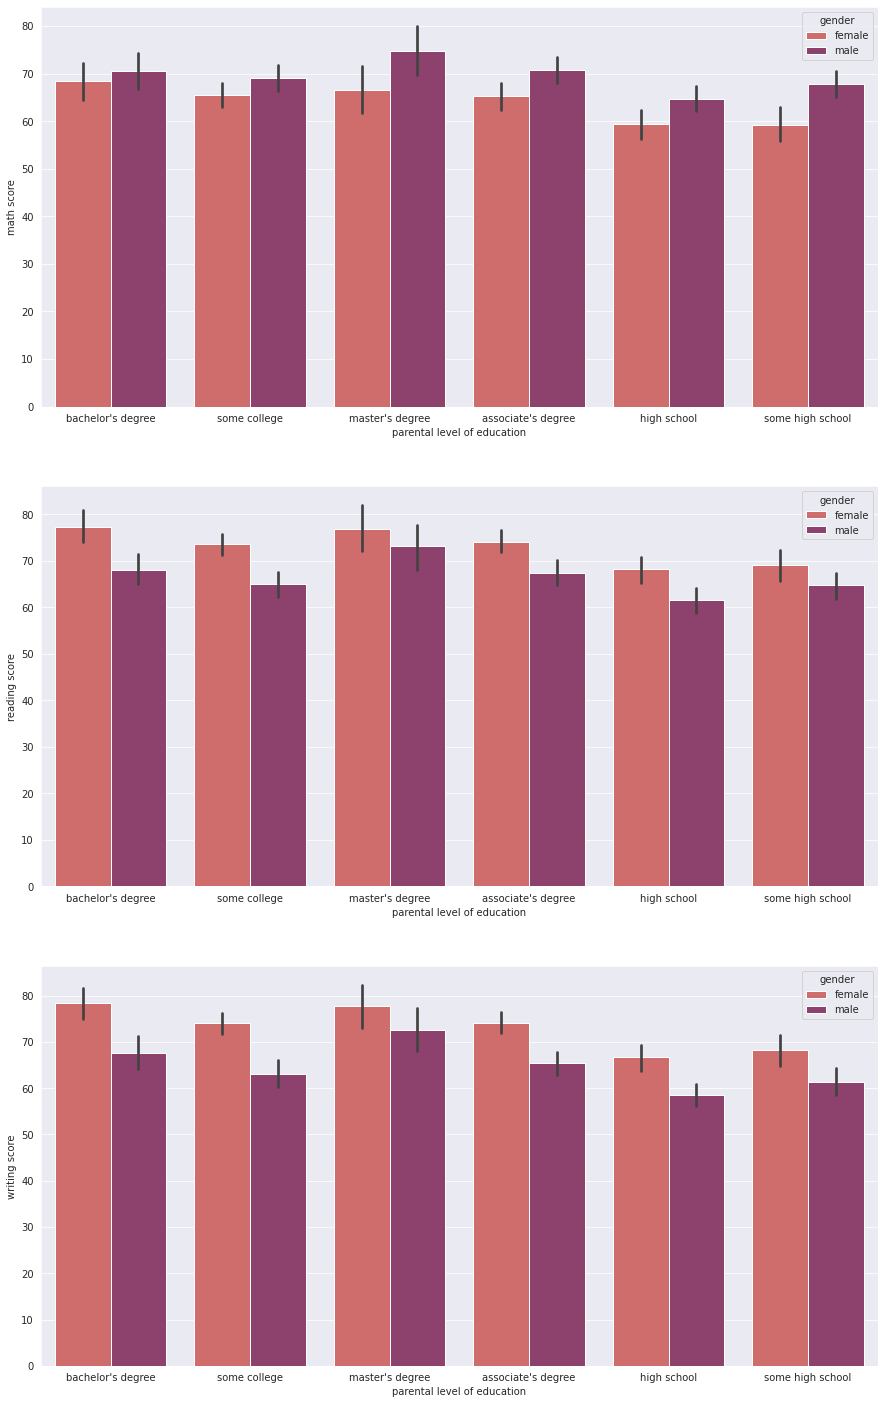

In [24]:
fig=plt.figure(figsize=(15,25)) 
columns = 1 
rows = 3
num_col = 0
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i) 
    sns.barplot(x = 'parental level of education',y = numerical_variables[num_col],hue = 'gender',data = data,palette = 'flare')
    num_col+=1
plt.show()

#### Using the parental level of education, we can see that there is a fair growth in the scores when the education level goes from high school to some college to a bachelor's degree to a master's degree.

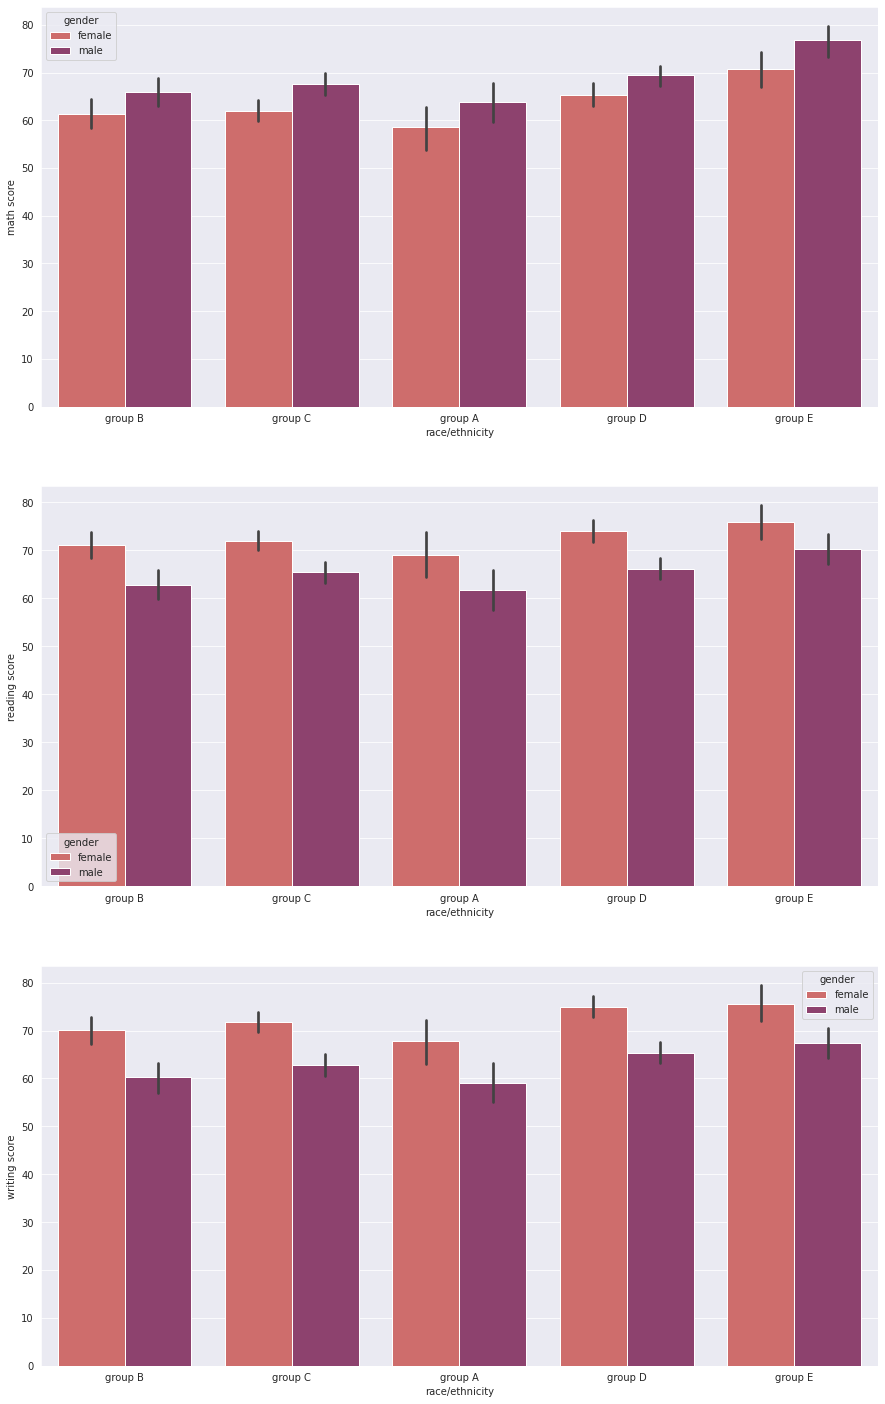

In [25]:
fig=plt.figure(figsize=(15,25)) 
columns = 1 
rows = 3
num_col = 0
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i) 
    sns.barplot(x = 'race/ethnicity',y = numerical_variables[num_col],hue = 'gender',data = data,palette = 'flare')
    num_col+=1
plt.show()

#### We can see the growth in the scores when the race/ethnicity moves from A to E so this will be an important feature.

### 5. Searching for outliers

#### In the scatterplots above we did not find any outliers in the numerical data. Plotting box plots of the categorical features against total marks might be useful to see if there are any outliers

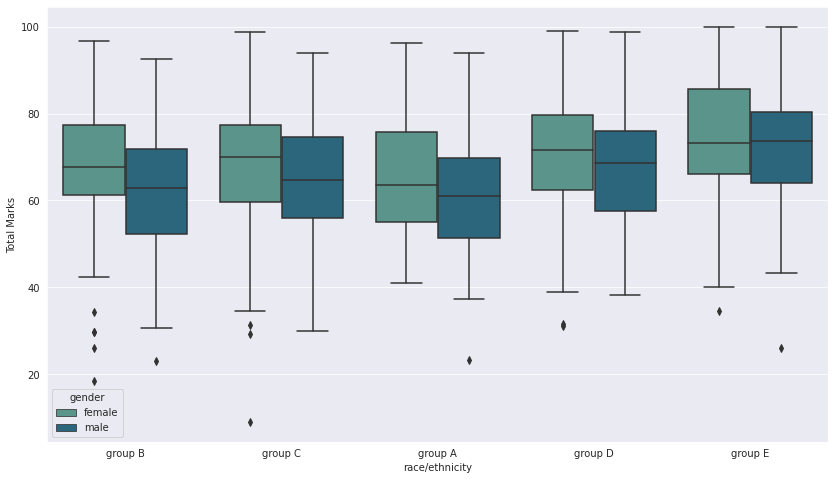

In [26]:
plt.figure(figsize = (14,8))
sns.boxplot(x = 'race/ethnicity',y = 'Total Marks',hue = 'gender',data = data,palette = 'crest')
plt.show()

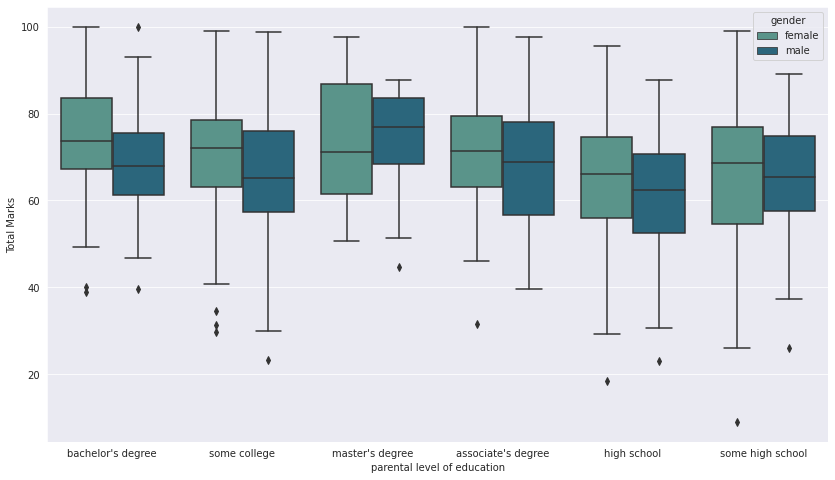

In [27]:
plt.figure(figsize = (14,8))
sns.boxplot(x = 'parental level of education',y = 'Total Marks',hue = 'gender',data = data,palette = 'crest')
plt.show()

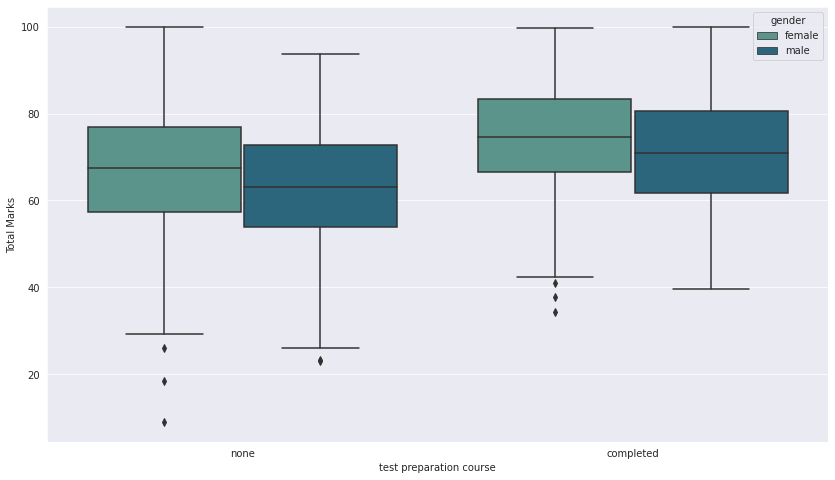

In [28]:
plt.figure(figsize = (14,8))
sns.boxplot(x = 'test preparation course',y = 'Total Marks',hue = 'gender',data = data,palette = 'crest')
plt.show()

#### We can see the outliers when the total marks are less han 40. Setting 40 as the threshold we can get rid of the samples where total marks are less than 40.

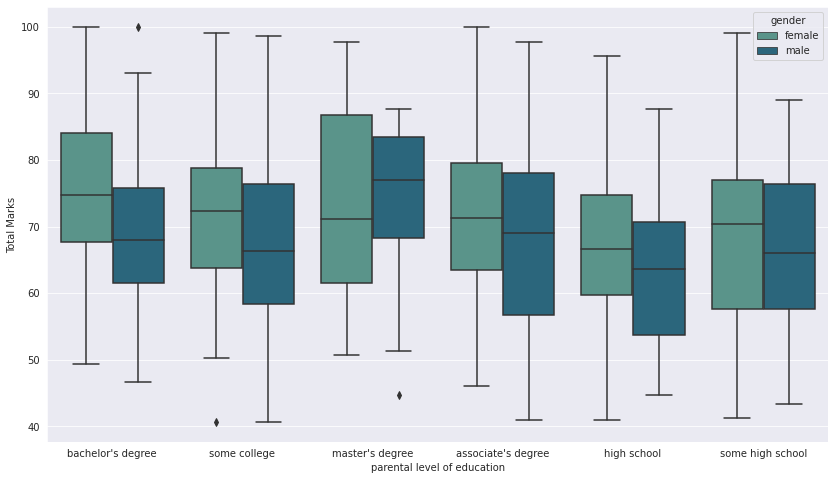

In [29]:
outliers_removed_data = data[data['Total Marks']>40]
plt.figure(figsize = (14,8))
sns.boxplot(x = 'parental level of education',y = 'Total Marks',hue = 'gender',data = outliers_removed_data,palette = 'crest')
plt.show()

### This data is ready to be used in a model if a model is to be made like linear regression using categorical features to predict the total marks. This EDA shows us feature importance towards Total marks which will be usuful while feeding features to a ML model.